In [808]:
#author 
"shreyas raja created @time using LSTM - Sequence modelling"
import numpy as np
import pandas as pd #to load the data 
import matplotlib as mpl # to plot figures 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #to split the data into training and testing   
from keras.preprocessing.sequence import TimeseriesGenerator # data processing for time series generator 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from keras import metrics 
import tensorflow as tf # to describe the architecture of the neural networks 

mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['axes.grid'] = False

In [822]:
df1 = pd.read_csv(('Guld_data.csv'),parse_dates=['date'])
#df.isnull()
#df = df.fillna(method='ffill')
df1= df1.interpolate('linear')
#df=df.fillna({'ET':0})
df1 = df1.loc[100:2181,]
#df= d.drop(columns={" "})
df1


,date,Precipitation,ET,GW1428A,GW1430,GW285,HK4003U,HK4004U,HK4012H,HK4013H,...,HK4256U,HK4258U,HK4262U,HK4302H,SGU903074482,SGU909128423,SGU912799781,SGU912799806,SGU912799815,SGU912799853
100,2014-10-20,0.1,1.476454096,NaN,17.053393,NaN,17.878947,19.622105,27.648611,23.237933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2014-10-21,1.6,1.363422669,NaN,17.053571,NaN,17.883860,19.622281,27.694975,23.238401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,2014-10-22,0.2,1.415943061,NaN,17.053750,NaN,17.888772,19.622456,27.741339,23.238870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2014-10-23,4.0,1.206753324,NaN,17.053929,NaN,17.893684,19.622632,27.787704,23.239338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2014-10-24,38.2,1.109158463,NaN,17.054107,NaN,17.898596,19.622807,27.834068,23.239806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,2020-06-26,1.0,2.041946536,44.29,16.740000,47.717958,17.984468,19.374400,21.992149,17.133709,...,22.294167,17.905417,17.658750,19.06843,22.398251,19.813529,22.525714,24.95,21.69,22.59
2177,2020-06-27,6.5,2.279865846,44.29,16.746667,47.717958,17.982979,19.362083,21.992149,17.359235,...,22.328750,17.969167,17.725417,19.06843,22.439857,19.812353,22.607143,24.95,21.69,22.59
2178,2020-06-28,2.5,1.222634836,44.29,16.753333,47.717958,17.981489,19.596667,21.992149,17.584761,...,22.329583,18.062083,17.812083,19.06843,22.481462,19.811176,22.688571,24.95,21.69,22.59
2179,2020-06-29,5.5,1.80884821,44.29,16.760000,47.717958,17.980000,19.615417,21.992149,17.810287,...,22.329583,18.125417,17.891667,19.06843,22.523068,19.810000,22.770000,24.95,21.69,22.59


In [813]:
df1=df1.fillna({'ET':0})
df1.isnull().sum()

date                0
Precipitation       0
ET                  0
GW1428A            37
GW1430              0
GW285             149
HK4003U             0
HK4004U             0
HK4012H             0
HK4013H             0
HK4014H             0
HK4101U             0
HK4102U             0
HK4115U            45
HK4206U           472
HK4226B           777
HK4256U          1155
HK4258U          1115
HK4262U          1116
HK4302H          1576
SGU903074482      772
SGU909128423      896
SGU912799781     1136
SGU912799806     1114
SGU912799815     1114
SGU912799853     1136
dtype: int64

In [816]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 100 to 2180
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2081 non-null   datetime64[ns]
 1   Precipitation  2081 non-null   float64       
 2   ET             2081 non-null   float64       
 3   GW1428A        2044 non-null   float64       
 4   GW1430         2081 non-null   float64       
 5   GW285          1932 non-null   float64       
 6   HK4003U        2081 non-null   float64       
 7   HK4004U        2081 non-null   float64       
 8   HK4012H        2081 non-null   float64       
 9   HK4013H        2081 non-null   float64       
 10  HK4014H        2081 non-null   float64       
 11  HK4101U        2081 non-null   float64       
 12  HK4102U        2081 non-null   float64       
 13  HK4115U        2036 non-null   float64       
 14  HK4206U        1609 non-null   float64       
 15  HK4226B        1304

In [815]:
df1['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df1['ET'] = pd.to_numeric(df['ET'],errors = 'coerce')


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

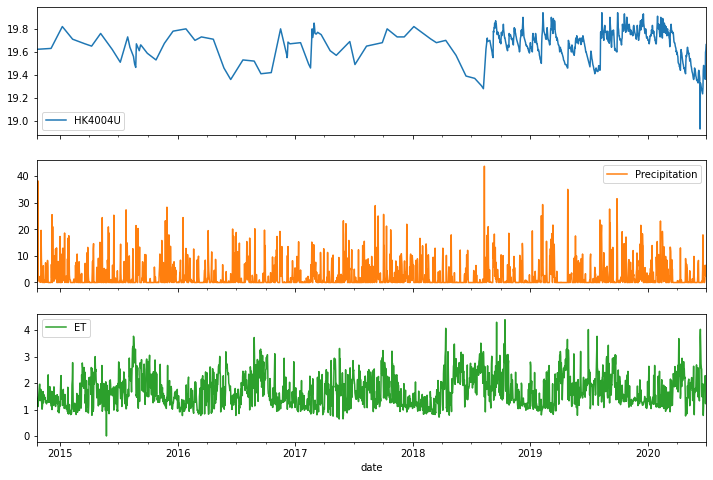

In [817]:
df1.set_index('date')[['HK4004U','Precipitation','ET']].plot(subplots=True) 

array([<AxesSubplot:xlabel='date'>], dtype=object)

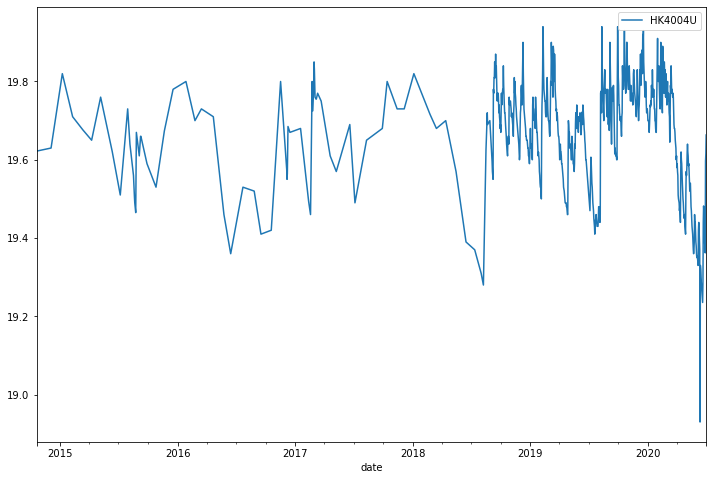

In [775]:
df.set_index('date')[['HK4004U']].plot(subplots=True) 

In [776]:
df_input=df[['HK4004U','Precipitation','ET','date']]

In [827]:
df_input =df[['HK4004U','Precipitation','ET','date']]
df_input= df.fillna({'ET':0})
df_input = df.isnull().sum()
df_input

date                     0
Precipitation            0
Relative Humidity        0
ET                       0
GW1428A                 37
GW1430                   0
GW285                  149
HK4003U                  0
HK4004U                  0
HK4012H                  0
HK4013H                  0
HK4014H                  0
HK4101U                  0
HK4102U                  0
HK4115U                 45
HK4206U                472
HK4226B                777
HK4256U               1155
HK4258U               1115
HK4262U               1116
HK4302H               1576
SGU903074482           772
SGU909128423           896
SGU912799781          1136
SGU912799806          1114
SGU912799815          1114
SGU912799853          1136
dtype: int64

In [670]:
df_input=df[['HK4004U','Precipitation','ET','date']]
df_input


,HK4004U,Precipitation,ET,date
100,19.622105,0.1,1.476454,2014-10-20
101,19.622281,1.6,1.363423,2014-10-21
102,19.622456,0.2,1.415943,2014-10-22
103,19.622632,4.0,1.206753,2014-10-23
104,19.622807,38.2,1.109158,2014-10-24
...,...,...,...,...
2176,19.374400,1.0,2.041947,2020-06-26
2177,19.362083,6.5,2.279866,2020-06-27
2178,19.596667,2.5,1.222635,2020-06-28
2179,19.615417,5.5,1.808848,2020-06-29


In [686]:
df_input.describe()

,HK4004U,Precipitation,ET
count,2081.000000,2081.000000,2081.000000
mean,19.645420,2.567756,1.712641
std,0.125835,4.943396,0.603239
min,18.930000,0.000000,0.000000
25%,19.574211,0.000000,1.237189
50%,19.670909,0.100000,1.604562
75%,19.734516,2.900000,2.083844
max,19.940000,43.700000,4.392801


In [825]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input) #thE reason for min max scaling is for the gradients to converge faster in the neural network model 
# and also this will not allow any changes in the mean and standard deviation.

TypeError: invalid type promotion

In [824]:
data_scaled

array([[0.68525274, 0.00228833, 0.22275107],
       [0.68542644, 0.03661327, 0.19262655],
       [0.68560014, 0.00457666, 0.206624  ],
       ...,
       [0.66006601, 0.05720824, 0.15510455],
       [0.67863037, 0.12585812, 0.31133893],
       [0.7260726 , 0.07551487, 0.15739975]])

In [715]:
features = data_scaled
target = data_scaled[:,0]

In [716]:
TimeseriesGenerator(features,target, length=0,sampling_rate=1, batch_size =1)[0]#length=2

(array([], shape=(1, 0, 3), dtype=float64), array([0.68525274]))

In [717]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=123,shuffle = False)
# shuffle = false , is important because it wont randomly shuffle with respect to time and training 80% of the data and not just 20%.

In [718]:
x_train.shape

(1664, 3)

In [719]:
x_test.shape

(417, 3)

win_length = 50
batch_size = 10
num_features = 3
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length

In [721]:
train_generator[0]


(array([[[0.68525274, 0.00228833, 0.22275107],
         [0.68542644, 0.03661327, 0.19262655],
         [0.68560014, 0.00457666, 0.206624  ],
         ...,
         [0.70381895, 0.0389016 , 0.27872927],
         [0.70919378, 0.58352403, 0.09496046],
         [0.7145686 , 0.        , 0.26653382]],
 
        [[0.68542644, 0.03661327, 0.19262655],
         [0.68560014, 0.00457666, 0.206624  ],
         [0.68577384, 0.09153318, 0.15087189],
         ...,
         [0.70919378, 0.58352403, 0.09496046],
         [0.7145686 , 0.        , 0.26653382],
         [0.71994342, 0.4805492 , 0.26907654]],
 
        [[0.68560014, 0.00457666, 0.206624  ],
         [0.68577384, 0.09153318, 0.15087189],
         [0.68594754, 0.87414188, 0.12486144],
         ...,
         [0.7145686 , 0.        , 0.26653382],
         [0.71994342, 0.4805492 , 0.26907654],
         [0.72531825, 0.17620137, 0.14150801]],
 
        ...,
 
        [[0.68646865, 0.04805492, 0.25197703],
         [0.68664235, 0.05034325, 0.29788

In [722]:
test_generator[0]

(array([[[0.71287129, 0.        , 0.36271923],
         [0.69306931, 0.        , 0.23490384],
         [0.67326733, 0.        , 0.27822672],
         ...,
         [0.62046205, 0.        , 0.40541681],
         [0.60973597, 0.        , 0.34979567],
         [0.5990099 , 0.        , 0.40598873]],
 
        [[0.69306931, 0.        , 0.23490384],
         [0.67326733, 0.        , 0.27822672],
         [0.65346535, 0.        , 0.31735673],
         ...,
         [0.60973597, 0.        , 0.34979567],
         [0.5990099 , 0.        , 0.40598873],
         [0.58828383, 0.        , 0.90074363]],
 
        [[0.67326733, 0.        , 0.27822672],
         [0.65346535, 0.        , 0.31735673],
         [0.65346535, 0.        , 0.34754053],
         ...,
         [0.5990099 , 0.        , 0.40598873],
         [0.58828383, 0.        , 0.90074363],
         [0.57755776, 0.        , 0.51662846]],
 
        ...,
 
        [[0.65346535, 0.        , 0.15118048],
         [0.7029703 , 0.2173913 , 0.34891

In [828]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [829]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 50, 128)           67584     
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 50, 128)           0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 50, 128)           131584    
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 50, 128)           0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 50, 128)           0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)              

In [725]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=50,validation_data =test_generator,
                             shuffle=False, callbacks = [early_stopping])

Epoch 1/50
162/162 [==============================] - 47s 289ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/50
162/162 [==============================] - 44s 272ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan


In [726]:
model.evaluate_generator(test_generator,verbose=0)

[nan, nan]

In [601]:
predictions=model.predict_generator(test_generator) # we can use train generator also to check predictions for the training set. 

In [602]:
predictions.shape[0]

367

In [603]:
predictions

array([[0.5863121 ],
       [0.5795895 ],
       [0.5682143 ],
       [0.55756104],
       [0.5471158 ],
       [0.53510267],
       [0.524     ],
       [0.56506217],
       [0.63369995],
       [0.6647693 ],
       [0.6523497 ],
       [0.6192496 ],
       [0.5887724 ],
       [0.56978273],
       [0.5529139 ],
       [0.5349078 ],
       [0.5234461 ],
       [0.514872  ],
       [0.50132656],
       [0.49055064],
       [0.4821415 ],
       [0.474632  ],
       [0.47392625],
       [0.48911113],
       [0.49802163],
       [0.50908583],
       [0.50885016],
       [0.5020475 ],
       [0.49430043],
       [0.49162817],
       [0.4867196 ],
       [0.48625925],
       [0.49543586],
       [0.52036035],
       [0.5326482 ],
       [0.5236322 ],
       [0.50823975],
       [0.5509003 ],
       [0.54654586],
       [0.80833566],
       [0.8217155 ],
       [0.82801557],
       [0.7861114 ],
       [0.9137503 ],
       [0.8484795 ],
       [0.8321283 ],
       [0.7925455 ],
       [0.773

In [604]:
y_test


array([0.71287129, 0.69306931, 0.67326733, 0.65346535, 0.65346535,
       0.64356436, 0.63366337, 0.65346535, 0.7029703 , 0.69306931,
       0.75247525, 0.78217822, 0.76237624, 0.74257426, 0.8019802 ,
       0.78217822, 0.76237624, 0.77227723, 0.75247525, 0.73267327,
       0.77227723, 0.76237624, 0.77227723, 0.76237624, 0.78217822,
       0.77227723, 0.7519802 , 0.72663366, 0.73188119, 0.77653465,
       0.78371287, 0.77227723, 0.75247525, 0.8019802 , 0.79207921,
       0.77227723, 0.76237624, 0.74257426, 0.73267327, 0.71287129,
       0.7029703 , 0.68316832, 0.66336634, 0.66336634, 0.65264026,
       0.64191419, 0.63118812, 0.62046205, 0.60973597, 0.5990099 ,
       0.58828383, 0.57755776, 0.56683168, 0.55610561, 0.54537954,
       0.53465347, 0.57920792, 0.62376238, 0.669967  , 0.65346535,
       0.62376238, 0.6039604 , 0.59405941, 0.57425743, 0.55445545,
       0.54455446, 0.53465347, 0.51485149, 0.5049505 , 0.4950495 ,
       0.47524752, 0.4950495 , 0.50990099, 0.51485149, 0.52475

In [605]:
x_test

array([[0.71287129, 0.        , 0.45566238],
       [0.69306931, 0.        , 0.34648802],
       [0.67326733, 0.        , 0.38349254],
       ...,
       [0.66006601, 0.05720824, 0.27832691],
       [0.67863037, 0.12585812, 0.41177555],
       [0.7260726 , 0.07551487, 0.28028738]])

In [606]:
x_test[:,1:][win_length:]

array([[0.        , 0.91521951],
       [0.        , 0.58712497],
       [0.        , 0.53105361],
       [0.        , 0.56544503],
       [0.01830664, 0.35302186],
       [0.00228833, 0.54916322],
       [0.20594966, 0.23476059],
       [0.24485126, 0.26095582],
       [0.        , 0.45507863],
       [0.        , 0.43320519],
       [0.        , 0.42883166],
       [0.        , 0.44455942],
       [0.        , 0.42559757],
       [0.        , 0.4366267 ],
       [0.        , 0.31708857],
       [0.03432494, 0.26641319],
       [0.        , 0.44466542],
       [0.        , 0.45598353],
       [0.        , 0.47810917],
       [0.00228833, 0.46066521],
       [0.13043478, 0.49171779],
       [0.01601831, 0.41033638],
       [0.07551487, 0.35113431],
       [0.        , 0.36196316],
       [0.        , 0.47857962],
       [0.        , 0.57523466],
       [0.        , 0.72523405],
       [0.        , 0.85716778],
       [0.04347826, 0.58806135],
       [0.        , 0.56868825],
       [0.

In [608]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [609]:
df_pred

,0,0,1
0,0.586312,0.000000,0.915220
1,0.579589,0.000000,0.587125
2,0.568214,0.000000,0.531054
3,0.557561,0.000000,0.565445
4,0.547116,0.018307,0.353022
...,...,...,...
362,0.451995,0.022883,0.464839
363,0.414096,0.148741,0.519000
364,0.400354,0.057208,0.278327
365,0.573443,0.125858,0.411776


In [610]:
rev_trans=scaler.inverse_transform(df_pred)

In [611]:
rev_trans

array([[19.52217524,  0.        ,  4.02037751],
       [19.51538538,  0.        ,  2.57912338],
       [19.50389644,  0.        ,  2.33281303],
       ...,
       [19.33435718,  2.5       ,  1.22263484],
       [19.50917749,  5.5       ,  1.80884821],
       [19.64231607,  3.3       ,  1.23124678]])

In [612]:
df_final=(df_input[predictions.shape[0]*-1:])


In [613]:
df_final.count()

HK4004U          367
Precipitation    367
ET               367
dtype: int64

In [617]:
df_final['HK4004U_Pred']=rev_trans[:,0]


<ipython-input-617-2a8a4fe90aeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['HK4004U_Pred']=rev_trans[:,0]


In [618]:
df_final


,HK4004U,Precipitation,ET,HK4004U_Pred
1814,19.524167,0.0,4.020378,19.522175
1815,19.513333,0.0,2.579123,19.515385
1816,19.502500,0.0,2.332813,19.503896
1817,19.491667,0.0,2.483888,19.493137
1818,19.480833,0.8,1.550755,19.482587
...,...,...,...,...
2176,19.374400,1.0,2.041947,19.386515
2177,19.362083,6.5,2.279866,19.348237
2178,19.596667,2.5,1.222635,19.334357
2179,19.615417,5.5,1.808848,19.509177


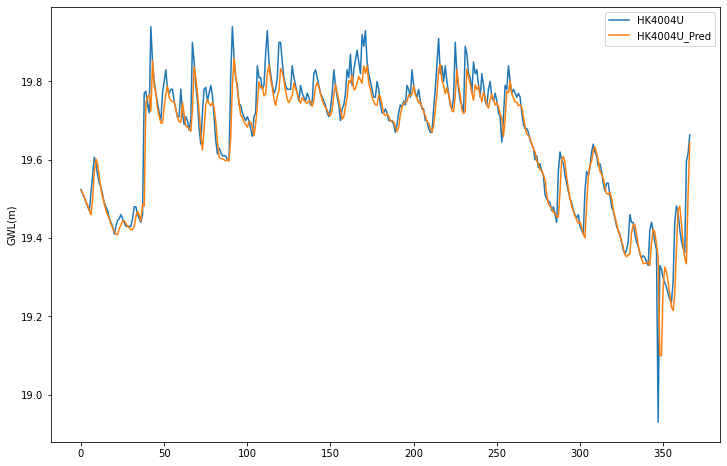

In [826]:
df_final.[['HK4004U','HK4004U_Pred']].plot(xlabel="Observations", ylabel="GWL(m)",use_index=False)

#ax = df_final.gca()
#ax.set_ylim([10,20])
#ax.set_xlim([2005:2025])
plt.savefig("GWL vs No. Of Observations.png")

In [515]:
y_hat_df = df_final
df_out = pd.merge(df,y_hat_df,left_index = False,right_index = False)
df_out

TypeError: Can only merge Series or DataFrame objects, a <class 'list'> was passed